# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.43s)
creating index...
index created!
loading annotations into memory...
Done (t=0.48s)
creating index...
index created!


In [11]:
ids[0:10]

[156, 509, 603, 918, 1072, 1727, 1728, 1767, 1768, 1769]

## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

In [13]:
coco.anns[156]['image_id']

558840

In [15]:
coco.loadImgs(558840)[0]['coco_url']

'http://images.cocodataset.org/val2014/COCO_val2014_000000558840.jpg'

In [18]:
coco_caps.showAnns(coco_caps.loadAnns(coco_caps.getAnnIds(558840)))

Tray of food disguised in car, on restaurant counter
A plate that has a cardboard car holding a hot dog and fries in it.
some food is sticking out of a toy car
A green surface with  a fifties car model on a plate, topped with a hotdog roll and fries, a napkin dispenser, menus and condiments, has  two sets of  hands on either side, reaching for items, one of which is part of a black and  red/wearing woman. 
A meal of a hot dog and fries served out of a plate that looks like a muscle car.


http://images.cocodataset.org/val2014/COCO_val2014_000000144273.jpg


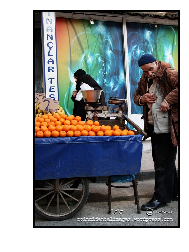

A man is looking at the fruit at the fruit stand
A man standing next to a large pile of oranges.
A man stand next to a blue street cart filled with oranges.
this man is looking at some fruit on display
A portable orange fruit stand on the city street.


In [20]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)